In [1]:
import json
import matplotlib.pyplot as plt
import os
import numpy as np
import mplhep as hep
hep.style.use(hep.styles.CMS)


In [2]:
BASE_DIR = "/home/laurits/ml-tau-en-reg/training-outputs/240812_3vars"
FRACS = np.array([0.001, 0.002, 0.003, 0.004, 0.005, 0.01])
ALGORITHMS = ['OmniParT', 'ParticleTransformer']
TRAINING_TYPES = ['dm_multiclass', 'jet_regression']
COLORS = {
    "OmniParT": 'magenta',
    "ParticleTransformer": "green"
}

In [3]:
def get_best_val_loss(path):
    with open(path) as inFile:
        data = json.load(inFile)
    val_losses = data['losses_validation']
    return np.min(val_losses)

In [4]:
plotting_data = {}
for training_type in TRAINING_TYPES:
    plotting_data[training_type] = {}
    for algorithm in ALGORITHMS:
        plotting_data[training_type][algorithm] = {}
        for frac in FRACS:
            frac_str = f"trainfrac_{frac}"
            plotting_data[training_type][algorithm][frac] = []
            for version in ["v1", "v2", "v3"]:
                path = os.path.join(BASE_DIR, version, frac_str, training_type, algorithm, "history.json")
                if os.path.exists(path):
                    min_val_loss = get_best_val_loss(path)
                    plotting_data[training_type][algorithm][frac].append(min_val_loss)

In [7]:
def plot_task_performances(plotting_data, training_type):
    for algorithm in ALGORITHMS:
        val_loss_mean, val_loss_stds, _ = get_algorithm_performances(plotting_data[training_type], algorithm)
        plt.plot(FRACS, val_loss_mean, label=algorithm, color=COLORS[algorithm])
        plt.fill_between(FRACS, val_loss_mean - val_loss_stds, val_loss_mean + val_loss_stds, color=COLORS[algorithm], alpha=0.3)
    plt.legend()
    plt.xlabel("Training fraction")
    plt.ylabel("Validation loss")
    plt.


def get_algorithm_performances(training_data, algorithm):
    val_loss_mean = []
    val_loss_stds = []
    for frac in FRACS:
        val_loss_mean.append(np.mean(training_data[algorithm][frac]))
        val_loss_stds.append(np.std(training_data[algorithm][frac]))
    return np.array(val_loss_mean), np.array(val_loss_stds), FRACS
        

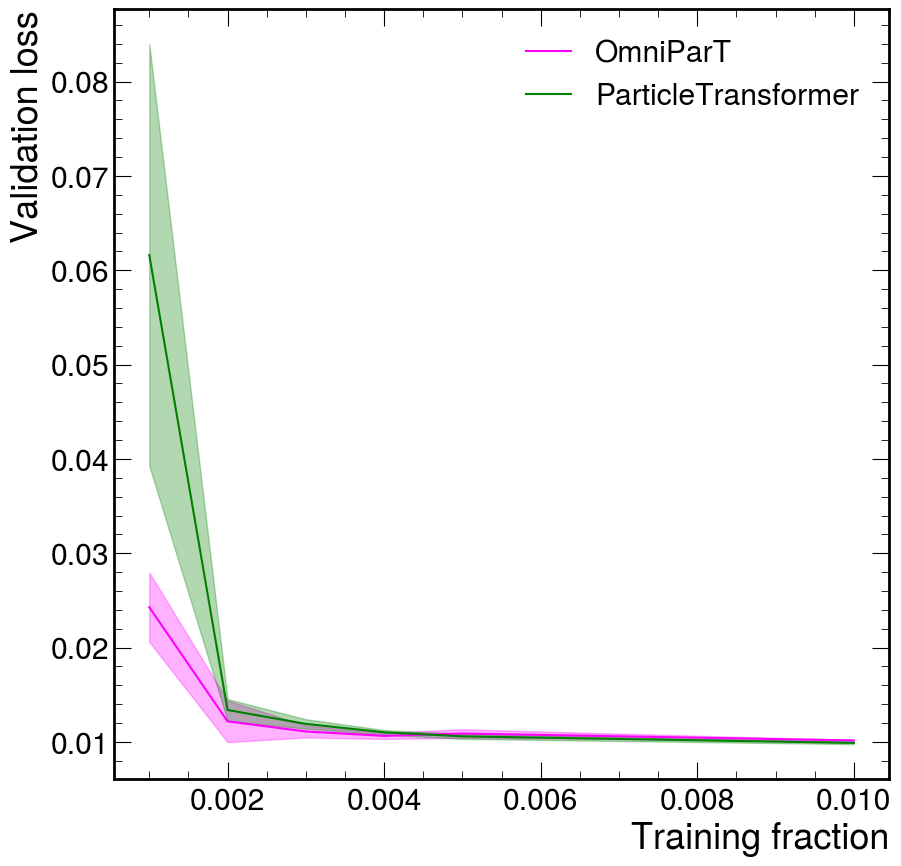

In [11]:
plot_task_performances(plotting_data, "jet_regression")

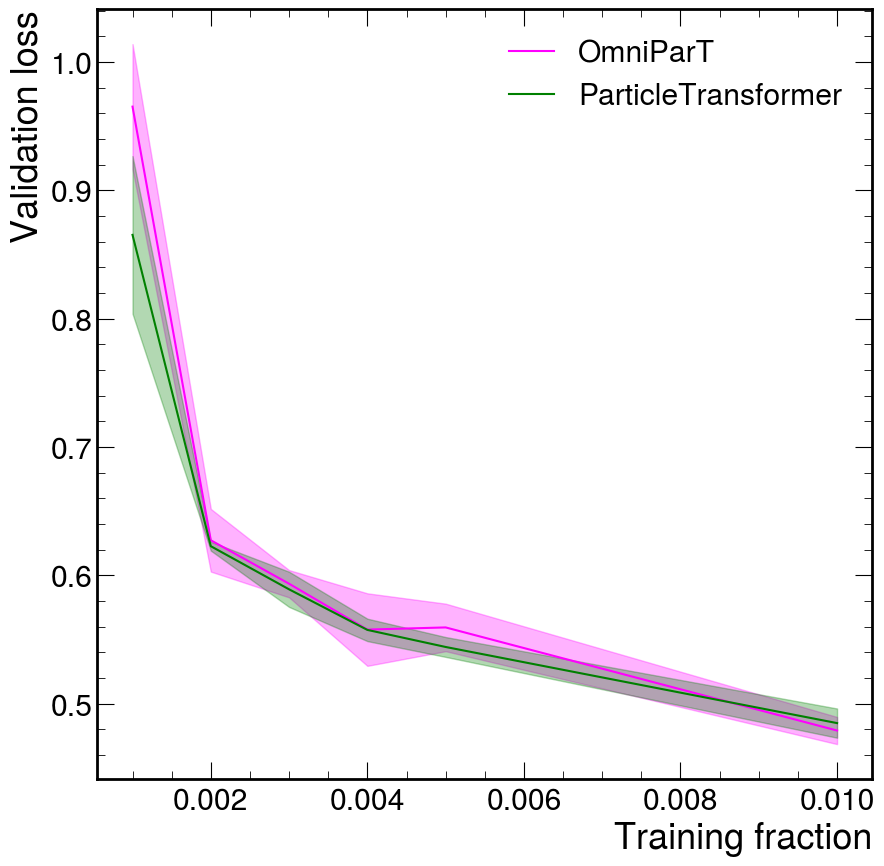

In [9]:
plot_task_performances(plotting_data, "dm_multiclass")
